일별시세 페이지 분석

In [1]:
index_cd = 'KPI200'
page_n = 1
naver_index = 'http://finance.naver.com/sise/sise_index_day.nhn?code=' + index_cd + '&page=' + str(page_n)

In [2]:
from urllib.request import urlopen  
source = urlopen(naver_index).read()
source

b'<html lang="ko">\n<head>\n<meta http-equiv="Content-Type" content="text/html; charset=euc-kr">\n<title>\xb3\xd7\xc0\xcc\xb9\xf6 \xb1\xdd\xc0\xb6</title>\n\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20210721200146/css/newstock.css">\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20210721200146/css/common.css">\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20210721200146/css/layout.css">\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20210721200146/css/main.css">\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20210721200146/css/newstock2.css">\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20210721200146/css/newstock3.css">\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20210721200146/css/wor

In [3]:
import bs4
source = bs4.BeautifulSoup(source, 'lxml')

In [4]:
print(source.prettify())

<html lang="ko">
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <title>
   네이버 금융
  </title>
  <link href="https://ssl.pstatic.net/imgstock/static.pc/20210721200146/css/newstock.css" rel="stylesheet" type="text/css"/>
  <link href="https://ssl.pstatic.net/imgstock/static.pc/20210721200146/css/common.css" rel="stylesheet" type="text/css"/>
  <link href="https://ssl.pstatic.net/imgstock/static.pc/20210721200146/css/layout.css" rel="stylesheet" type="text/css"/>
  <link href="https://ssl.pstatic.net/imgstock/static.pc/20210721200146/css/main.css" rel="stylesheet" type="text/css"/>
  <link href="https://ssl.pstatic.net/imgstock/static.pc/20210721200146/css/newstock2.css" rel="stylesheet" type="text/css"/>
  <link href="https://ssl.pstatic.net/imgstock/static.pc/20210721200146/css/newstock3.css" rel="stylesheet" type="text/css"/>
  <link href="https://ssl.pstatic.net/imgstock/static.pc/20210721200146/css/world.css" rel="stylesheet" type="text/css"/>
 </head

In [5]:
td = source.find_all('td')
len(td)

54

날짜 추출

In [6]:
# /html/body/div/table[1]/tbody/tr[3]/td[1]
source.find_all('table')[0].find_all('tr')[2].find_all('td')[0]


<td class="date">2021.07.22</td>

In [7]:
d = source.find_all('td', class_='date')[0].text
d

'2021.07.22'

In [8]:
import datetime as dt

In [9]:
yyyy = int(d.split('.')[0]) 
mm = int(d.split('.')[1])
dd = int(d.split('.')[2])

this_date= dt.date(yyyy, mm, dd)
this_date

datetime.date(2021, 7, 22)

날짜정보를  date 타입으로 변경하는 함수 정의

In [10]:
def date_format(d):
    d = str(d).replace('-', '.')
    
    yyyy = int(d.split('.')[0]) 
    mm = int(d.split('.')[1])
    dd = int(d.split('.')[2])

    this_date= dt.date(yyyy, mm, dd)
    return this_date

종가 추출

In [11]:
# /html/body/div/table[1]/tbody/tr[3]/td[2]

In [12]:
this_close = source.find_all('tr')[2].find_all('td')[1].text
this_close = this_close.replace(',', '')
this_close = float(this_close)
this_close

431.38

In [13]:
p = source.find_all('td', class_='number_1')[0].text
p

'431.38'

페이지 상의 날짜와 종가정보 전체 추출

In [14]:
dates = source.find_all('td', class_='date')
prices = source.find_all('td', class_='number_1')

In [15]:
len(dates)

6

In [16]:
len(prices)

24

In [17]:
for n in range(len(dates)):
    this_date = dates[n].text
    this_date = date_format(this_date)
    
    this_close = prices[n*4].text   
    # 0, 4, 8, ... 4의 배수로 돌아가는 가격 추출
    this_close = this_close.replace(',', '')
    this_close = float(this_close)
    this_close
    
    print(this_date, this_close)

2021-07-22 431.38
2021-07-21 426.0
2021-07-20 428.55
2021-07-19 429.89
2021-07-16 434.82
2021-07-15 436.76


마지막 페이지 번호 찾기

In [18]:
# /html/body/div/table[2]/tbody/tr/td[7]/a

In [19]:
paging = source.find('td', class_='pgRR').find('a')['href']
paging

'/sise/sise_index_day.nhn?code=KPI200&page=641'

In [20]:
paging = paging.split('&')[1]
paging

'page=641'

In [21]:
paging = paging.split('=')[1]
paging

'641'

In [22]:
naver_index = 'http://finance.naver.com/sise/sise_index_day.nhn?code=' + index_cd + '&page=' + str(505)

source = urlopen(naver_index).read()
source = bs4.BeautifulSoup(source, 'lxml')

if source.find('td', class_='pgRR'):
    last_page = source.find('td', class_='pgRR').find('a')['href']
    last_page = last_page.split('&')[1]
    last_page = last_page.split('=')[1]
    last_page = int(last_page)

In [23]:
def historical_index_naver(index_cd, page_n=1, last_page=0):   
        
    naver_index = 'http://finance.naver.com/sise/sise_index_day.nhn?code=' + index_cd + '&page=' + str(page_n)
    
    source = urlopen(naver_index).read()   # 지정한 페이지에서 코드 읽기
    source = bs4.BeautifulSoup(source, 'lxml')   # 뷰티풀 스프로 태그별로 코드 분류
    
    dates = source.find_all('td', class_='date')   # <td class="date">태그에서 날짜 수집   
    prices = source.find_all('td', class_='number_1')   # <td class="number_1">태그에서 지수 수집
    
    for n in range(len(dates)):
    
        if dates[n].text.split('.')[0].isdigit():
            
            # 날짜 처리
            this_date = dates[n].text
            this_date= date_format(this_date)
            
            # 종가 처리
            this_close = prices[n*4].text   # prices 중 종가지수인 0,4,8,...번째 데이터 추출
            this_close = this_close.replace(',', '')
            this_close = float(this_close)

            # 딕셔너리에 저장
            historical_prices[this_date] = this_close
            
    # 페이지 네비게이션
    if last_page == 0:
        last_page = source.find('td', class_='pgRR').find('a')['href']
        # 마지막페이지 주소 추출
        last_page = last_page.split('&')[1]   # & 뒤의 page=506 부분 추출
        last_page = last_page.split('=')[1]   # = 뒤의 페이지번호만 추출
        last_page = int(last_page)   # 숫자형 변수로 변환
        
    # 다음 페이지 호출
    if page_n < last_page:   
        page_n = page_n + 1   
        historical_index_naver(index_cd, start_date, end_date, page_n, last_page)   
        
    return historical_prices  

네이버에서 일자별 인덱스를 추출하는 함수 정의

In [24]:
def historical_index_naver(index_cd, start_date='', end_date='', page_n=1, last_page=0):
    
    if start_date:   # start_date가 있으면
        start_date = date_format(start_date)   # date 포맷으로 변환
    else:    # 없으면
        start_date = dt.date.today()   # 오늘 날짜를 지정
    if end_date:   
        end_date = date_format(end_date)   
    else:   
        end_date = dt.date.today()  
        
        
    naver_index = 'http://finance.naver.com/sise/sise_index_day.nhn?code=' + index_cd + '&page=' + str(page_n)
    
    source = urlopen(naver_index).read()   # 지정한 페이지에서 코드 읽기
    source = bs4.BeautifulSoup(source, 'lxml')   # 뷰티풀 스프로 태그별로 코드 분류
    
    dates = source.find_all('td', class_='date')   # <td class="date">태그에서 날짜 수집   
    prices = source.find_all('td', class_='number_1')   # <td class="number_1">태그에서 지수 수집
    
    for n in range(len(dates)):
    
        if dates[n].text.split('.')[0].isdigit():
            
            # 날짜 처리
            this_date = dates[n].text
            this_date= date_format(this_date)
            
            if this_date <= end_date and this_date >= start_date:   
            # start_date와 end_date 사이에서 데이터 저장
                # 종가 처리
                this_close = prices[n*4].text   # prices 중 종가지수인 0,4,8,...번째 데이터 추출
                this_close = this_close.replace(',', '')
                this_close = float(this_close)

                # 딕셔너리에 저장
                historical_prices[this_date] = this_close
                
            elif this_date < start_date:   
            # start_date 이전이면 함수 종료
                return historical_prices              
            
    # 페이지 네비게이션
    if last_page == 0:
        last_page = source.find('td', class_='pgRR').find('a')['href']
        # 마지막페이지 주소 추출
        last_page = last_page.split('&')[1]   # & 뒤의 page=506 부분 추출
        last_page = last_page.split('=')[1]   # = 뒤의 페이지번호만 추출
        last_page = int(last_page)   # 숫자형 변수로 변환
        
    # 다음 페이지 호출
    if page_n < last_page:   
        page_n = page_n + 1   
        historical_index_naver(index_cd, start_date, end_date, page_n, last_page)   
        
    return historical_prices  

In [25]:
index_cd = 'KPI200'
historical_prices = dict()
historical_index_naver(index_cd, '2021-4-1', '2021-4-4')
historical_prices

{datetime.date(2021, 4, 2): 423.74, datetime.date(2021, 4, 1): 419.42}

# 다음에서 해외지수 추출 (다음 사이트 개편으로 네이버로 대체합니다)

본 섹션의 내용은 다음 금융사이트 개편으로 사용이 불가해져, 네이버에서 해외지수 추출로 대체합니다.

# 네이버에서 해외지수 추출하기 (다음 해외지수 대체)

In [26]:
import pandas as pd
import requests, json   # 해외지수는 json 형태로 표출됨
headers = {
    'User-Agent': 'Mozilla/5.0',
    'X-Requested-With': 'XMLHttpRequest',
}

In [27]:
symbol = 'SPI@SPX'
page = 3

In [28]:
url = 'https://finance.naver.com/world/worldDayListJson.nhn?symbol='+symbol+'&fdtc=0&page='+str(page)
r = requests.post(url, headers=headers)
data = json.loads(r.text)

In [29]:
data[0]

{'symb': 'SPI@SPX',
 'xymd': '20210623',
 'open': 4249.27,
 'high': 4256.6,
 'low': 4241.43,
 'clos': 4241.84,
 'diff': -4.6,
 'rate': -0.11,
 'gvol': 1774854380}

In [30]:
data[0]['symb']

'SPI@SPX'

In [31]:
data[0]['xymd']

'20210623'

In [32]:
data[0]['clos']

4241.84

In [33]:
len(data)

10

In [34]:
d = dict()
for n in range(len(data)):
    date = pd.to_datetime(data[n]['xymd']).date()
    price = float(data[n]['clos'])
    d[date] = price
print(d)

{datetime.date(2021, 6, 23): 4241.84, datetime.date(2021, 6, 22): 4246.44, datetime.date(2021, 6, 21): 4224.79, datetime.date(2021, 6, 18): 4166.45, datetime.date(2021, 6, 17): 4221.86, datetime.date(2021, 6, 16): 4223.7, datetime.date(2021, 6, 15): 4246.59, datetime.date(2021, 6, 14): 4255.15, datetime.date(2021, 6, 11): 4247.44, datetime.date(2021, 6, 10): 4239.18}


In [35]:
def read_json(d, symbol, page=1):
    url = 'https://finance.naver.com/world/worldDayListJson.nhn?symbol='+symbol+'&fdtc=0&page='+str(page)
    r = requests.post(url, headers=headers)
    data = json.loads(r.text)
    
    for n in range(len(data)):
        date = pd.to_datetime(data[n]['xymd']).date()
        price = float(data[n]['clos'])
        d[date] = price
        
    if len(data) >= 9 and page<3:
        page += 1
        read_json(d, symbol, page)
        
    return d

In [36]:
historical_index = dict()
historical_index = read_json(historical_index, symbol, page)

In [37]:
historical_index

{datetime.date(2021, 6, 23): 4241.84,
 datetime.date(2021, 6, 22): 4246.44,
 datetime.date(2021, 6, 21): 4224.79,
 datetime.date(2021, 6, 18): 4166.45,
 datetime.date(2021, 6, 17): 4221.86,
 datetime.date(2021, 6, 16): 4223.7,
 datetime.date(2021, 6, 15): 4246.59,
 datetime.date(2021, 6, 14): 4255.15,
 datetime.date(2021, 6, 11): 4247.44,
 datetime.date(2021, 6, 10): 4239.18}

In [38]:
indices = {
    'SPI@SPX' : 'S&P 500', 
    'NAS@NDX' : 'Nasdaq 100', 
    'NII@NI225' : 'Nikkei 225',
}

In [39]:
historical_indices = dict()
for key, value in indices.items(): 
    print (key, value)
    s = dict()
    s = read_json(s, key, 1)
    historical_indices[value] = s    
prices_df = pd.DataFrame(historical_indices)
prices_df.sort_index(inplace=True)

SPI@SPX S&P 500
NAS@NDX Nasdaq 100
NII@NI225 Nikkei 225


In [40]:
prices_df.tail(3)

,S&P 500,Nasdaq 100,Nikkei 225
2021-07-19,4258.49,14549.09,27652.74
2021-07-20,4323.06,14728.21,27388.16
2021-07-21,4358.69,14842.63,27548.00


In [41]:
def date_format(d=''):
    if d != '':
        this_date = pd.to_datetime(d).date()
    else:
        this_date = pd.Timestamp.today().date()   # 오늘 날짜를 지정
    return (this_date)

In [42]:
def index_global(d, symbol, start_date='', end_date='', page=1):

    end_date = date_format(end_date)
    if start_date == '':
        start_date = end_date - pd.DateOffset(months=1)
    start_date = date_format(start_date)
        
    url = 'https://finance.naver.com/world/worldDayListJson.nhn?symbol='+symbol+'&fdtc=0&page='+str(page)
    r = requests.post(url, headers=headers)
    data = json.loads(r.text)
    
    if len(data) > 0:
        
        for n in range(len(data)):
            date = pd.to_datetime(data[n]['xymd']).date()

            if date <= end_date and date >= start_date:   
            # start_date와 end_date 사이에서 데이터 저장
                # 종가 처리
                price = float(data[n]['clos'])
                # 딕셔너리에 저장
                d[date] = price
            elif date < start_date:   
            # start_date 이전이면 함수 종료
                return d              

        if len(data) >= 9:
            page += 1
            index_global(d, symbol, start_date, end_date, page)
        
    return d

In [43]:
historical_indices = dict()
start_date = '2021-01-01'
end_date = '2021-3-31'
for key, value in indices.items(): 
    s = dict()
    s = index_global(s, key, start_date, end_date)
    historical_indices[value] = s    
prices_df = pd.DataFrame(historical_indices)

In [44]:
prices_df[:30]

,S&P 500,Nasdaq 100,Nikkei 225
2021-03-31,3972.89,13091.44,29178.80
2021-03-30,3958.55,12896.53,29432.70
2021-03-29,3971.09,12965.74,29384.52
2021-03-26,3974.54,12979.12,29176.70
2021-03-25,3909.52,12780.51,28729.88
2021-03-24,3889.14,12798.88,28405.52
2021-03-23,3910.52,13017.79,28995.92
2021-03-22,3940.59,13086.51,29174.15
2021-03-19,3913.10,12866.99,29792.05
2021-03-18,3915.46,12789.14,30216.75


# 만들어둔 함수를 이용해 KOSPI200과 S&P500 지수 추출

In [45]:
index_cd = 'KPI200'
historical_prices = dict()
kospi200 = historical_index_naver(index_cd, '2020-1-1', '2020-12-31')

In [46]:
index_cd = 'SPI@SPX'
historical_prices = dict()
sp500 = index_global(historical_prices, index_cd, '2020-1-1', '2020-12-31')    # 대체 코드
# sp500 = historical_global_daum(index_cd, '2017-1-1', '2017-12-31')    # 이전 코드

In [47]:
tmp = {'S&P500':sp500, 'KOSPI200':kospi200}

In [48]:
import pandas as pd

In [49]:
df = pd.DataFrame(tmp)
df.sort_index(inplace=True)
df

,S&P500,KOSPI200
2020-01-02,3257.85,290.35
2020-01-03,3234.85,290.74
2020-01-06,3246.28,288.43
2020-01-07,3237.18,291.23
2020-01-08,3253.05,289.42
...,...,...
2020-12-24,3703.06,379.18
2020-12-28,3735.36,379.93
2020-12-29,3727.04,381.27
2020-12-30,3732.04,389.29


In [50]:
df = df.fillna(method='ffill')
if df.isnull().values.any():
    df = df.fillna(method='bfill')
df

,S&P500,KOSPI200
2020-01-02,3257.85,290.35
2020-01-03,3234.85,290.74
2020-01-06,3246.28,288.43
2020-01-07,3237.18,291.23
2020-01-08,3253.05,289.42
...,...,...
2020-12-24,3703.06,379.18
2020-12-28,3735.36,379.93
2020-12-29,3727.04,381.27
2020-12-30,3732.04,389.29


In [51]:
df.head()

,S&P500,KOSPI200
2020-01-02,3257.85,290.35
2020-01-03,3234.85,290.74
2020-01-06,3246.28,288.43
2020-01-07,3237.18,291.23
2020-01-08,3253.05,289.42


In [52]:
index_cd = 'KPI200'
historical_prices = dict()
kospi200 = historical_index_naver(index_cd, '2020-1-1', '2021-12-31')

In [53]:
index_cd = 'SPI@SPX'
historical_prices = dict()
sp500 = index_global(historical_prices, index_cd, '2020-1-1', '2021-12-31')    # 대체 코드
# sp500 = historical_global_daum(index_cd, '2008-1-1', '2017-12-31')     # 이전 코드

In [54]:
tmp = {'S&P500':sp500, 'KOSPI200':kospi200}

In [55]:
df = pd.DataFrame(tmp)
df.sort_index(inplace=True)
df

,S&P500,KOSPI200
2020-01-02,3257.85,290.35
2020-01-03,3234.85,290.74
2020-01-06,3246.28,288.43
2020-01-07,3237.18,291.23
2020-01-08,3253.05,289.42
...,...,...
2021-07-16,4327.16,434.82
2021-07-19,4258.49,429.89
2021-07-20,4323.06,428.55
2021-07-21,4358.69,426.00


In [56]:
df = df.fillna(method='ffill')
if df.isnull().values.any():
    df = df.fillna(method='bfill')
df

,S&P500,KOSPI200
2020-01-02,3257.85,290.35
2020-01-03,3234.85,290.74
2020-01-06,3246.28,288.43
2020-01-07,3237.18,291.23
2020-01-08,3253.05,289.42
...,...,...
2021-07-16,4327.16,434.82
2021-07-19,4258.49,429.89
2021-07-20,4323.06,428.55
2021-07-21,4358.69,426.00


# matplotlib를 이용해 그래프 그리기

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline

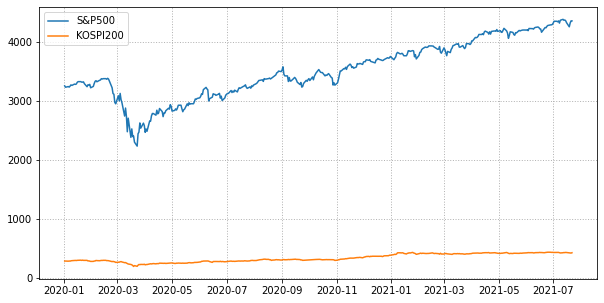

In [58]:
plt.figure(figsize=(10, 5))
plt.plot(df['S&P500'], label='S&P500')
plt.plot(df['KOSPI200'], label='KOSPI200')
plt.legend(loc=0)
plt.grid(True, color='0.7', linestyle=':', linewidth=1)

In [59]:
df.iloc[0]

S&P500      3257.85
KOSPI200     290.35
Name: 2020-01-02, dtype: float64

In [60]:
df.loc[dt.date(2020, 1, 2)]

S&P500      3257.85
KOSPI200     290.35
Name: 2020-01-02, dtype: float64

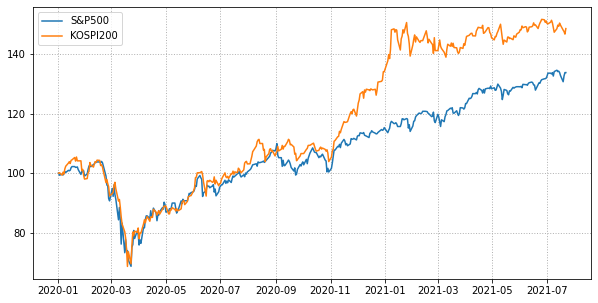

In [61]:
plt.figure(figsize=(10, 5))
plt.plot(df['S&P500'] / df['S&P500'].loc[dt.date(2020, 1, 2)] * 100, label='S&P500')
plt.plot(df['KOSPI200'] / df['KOSPI200'].loc[dt.date(2020, 1, 2)] * 100, label='KOSPI200')
plt.legend(loc=0)
plt.grid(True, color='0.7', linestyle=':', linewidth=1)

In [62]:
df_ratio_2021_now = df.loc[dt.date(2021, 1, 1):] / df.loc[dt.date(2021, 1, 4)] * 100
df_ratio_2021_now.head(3)

,S&P500,KOSPI200
2021-01-04,100.000000,100.000000
2021-01-05,100.708254,101.537961
2021-01-06,101.283288,100.550165


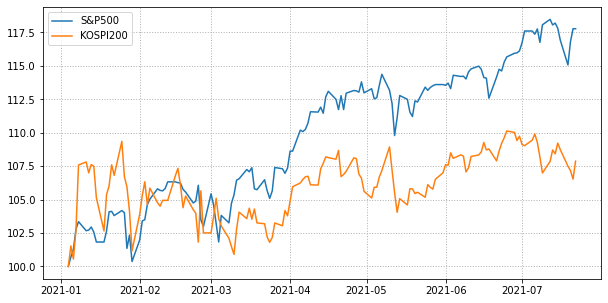

In [63]:
plt.figure(figsize=(10, 5))
plt.plot(df_ratio_2021_now['S&P500'], label='S&P500')
plt.plot(df_ratio_2021_now['KOSPI200'], label='KOSPI200')
plt.legend(loc=0)
plt.grid(True, color='0.7', linestyle=':', linewidth=1)

Text(0, 0.5, 'KOSPI200')

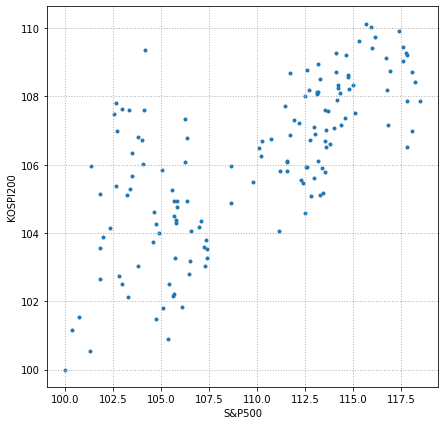

In [64]:
plt.figure(figsize=(7,7))
plt.scatter(df_ratio_2021_now['S&P500'], df_ratio_2021_now['KOSPI200'], marker='.')
plt.grid(True, color='0.7', linestyle=':', linewidth=1)
plt.xlabel('S&P500')
plt.ylabel('KOSPI200')

In [65]:
import numpy as np
from sklearn.linear_model import LinearRegression

x = df_ratio_2021_now['S&P500']
y = df_ratio_2021_now['KOSPI200']

# 1개 컬럼 np.array로 변환
independent_var = np.array(x).reshape(-1, 1)
dependent_var = np.array(y).reshape(-1, 1)

# Linear Regression
regr = LinearRegression()
regr.fit(independent_var, dependent_var)

result = {'Slope':regr.coef_[0,0], 'Intercept':regr.intercept_[0], 'R^2':regr.score(independent_var, dependent_var) }
result

{'Slope': 0.3162166688403968,
 'Intercept': 71.37609412999917,
 'R^2': 0.49979819059573805}

Text(0, 0.5, 'KOSPI200')

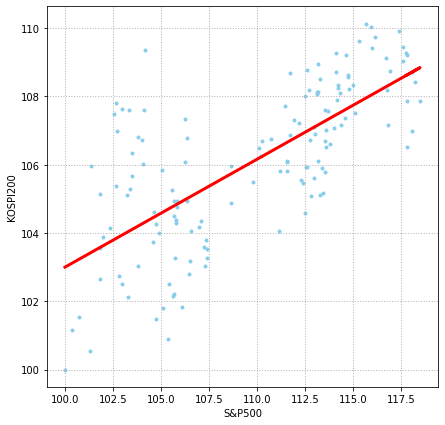

In [66]:
plt.figure(figsize=(7,7))
plt.scatter(independent_var, dependent_var, marker='.', color='skyblue')
plt.plot(independent_var, regr.predict(independent_var), color='r', linewidth=3)
plt.grid(True, color='0.7', linestyle=':', linewidth=1)
plt.xlabel('S&P500')
plt.ylabel('KOSPI200')